### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('sample_data/coupons.csv')

In [8]:
data.sample(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
8335,Home,Alone,Snowy,30,10PM,Restaurant(20-50),2h,Female,41,Married partner,...,4~8,gt8,1~3,less1,1,0,0,0,1,0
5559,Home,Alone,Sunny,80,10PM,Restaurant(<20),2h,Female,41,Married partner,...,1~3,1~3,1~3,1~3,1,0,0,1,0,1
7593,Home,Partner,Sunny,80,6PM,Coffee House,1d,Male,26,Married partner,...,less1,1~3,less1,less1,1,0,0,1,0,1
12113,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,36,Married partner,...,1~3,4~8,4~8,4~8,1,1,0,0,1,0
12231,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,21,Married partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,0
5193,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,50plus,Unmarried partner,...,never,4~8,1~3,less1,1,0,0,0,1,0
1922,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,31,Single,...,1~3,4~8,gt8,less1,1,1,0,0,1,1
9333,Work,Alone,Sunny,80,7AM,Restaurant(<20),1d,Female,46,Divorced,...,1~3,1~3,1~3,1~3,1,0,0,0,1,1
5493,Work,Alone,Sunny,80,7AM,Coffee House,2h,Female,41,Single,...,less1,less1,less1,never,1,0,0,1,0,0
6397,Home,Alone,Sunny,80,10PM,Restaurant(<20),2h,Male,31,Single,...,never,1~3,1~3,1~3,1,0,0,1,0,1


In [9]:
data.shape


(12684, 26)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [11]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. Investigate the dataset for missing or problematic data.

In [12]:

# Check for missing values
missing_values = data.isna().sum()
print("Missing values:\n", missing_values)

# Check for duplicate rows
duplicate_rows_count = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows_count)

# Check data types and identify potential inconsistencies
print("\nData types:\n", data.dtypes)


Missing values:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Number of duplicate rows: 74

Data types:
 destination             object
passanger               object
weather                 object
temperature              int64
time                  

3. Decide what to do about your missing data -- drop, replace, other...

*   We notice that the 'car' column is missing 12576 values. So we can drop this column as the variable does not have any significance.
*   We can drop the null rows if we can retain over 95% of the data and coupon acceptance rate does not change significantly, which indicates that missing values aren't introducing significant bias.


In [13]:
data = data.drop(columns=['car'])

In [14]:
data_dropped_na = data.dropna()
data_dropped_na.shape
percent_data_retained = round(len(data_dropped_na) / len(data) * 100, 2)
percent_data_retained

percent_accepted_with_nulls = round((data['Y'] == 1).mean() * 100, 2)
percent_accepted_without_nulls = round((data_dropped_na['Y'] == 1).mean() * 100, 2)

print(f"Percentage of data retained after dropping nulls: {percent_data_retained}%")
print(f"Coupons accepted - with nulls: {percent_accepted_with_nulls}%,")
print(f"without nulls: {percent_accepted_without_nulls}%")

data = data.dropna()
data.shape

Percentage of data retained after dropping nulls: 95.23%
Coupons accepted - with nulls: 56.84%,
without nulls: 56.93%


(12079, 25)

4. What proportion of the total observations chose to accept the coupon?



In [15]:
# for the dataset after dropping rows with at least one NaN value
percent_accepted = round(len(data[data['Y'] == 1])/len(data) * 100, 2)
print(f'Percent of coupons accepted: {percent_accepted}%')

# for the original dataset
data_original = pd.read_csv('sample_data/coupons.csv')
percent_accepted_original = round(len(data_original[data_original['Y'] == 1])/len(data_original) * 100, 2)
print(f'Percent of coupons accepted: {percent_accepted_original}%')

Percent of coupons accepted: 56.93%
Percent of coupons accepted: 56.84%


5. Use a bar plot to visualize the `coupon` column.

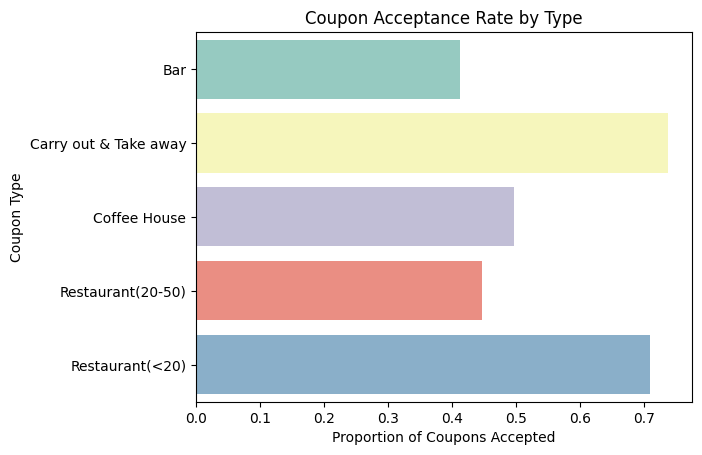

In [16]:
# Plot coupon acceptance with coupon names on the Y-axis for better readability
# Sort coupons alphabetically so similar types (e.g., restaurants) appear together
sorted_coupons = sorted(data['coupon'].unique())

sns.barplot(
    data=data,
    x='Y',
    y='coupon',
    order=sorted_coupons,
    errorbar=None,
    palette='Set3',
    hue='coupon',
    hue_order=sorted_coupons
)

plt.xlabel('Proportion of Coupons Accepted')
plt.ylabel('Coupon Type')
plt.title('Coupon Acceptance Rate by Type')
plt.show()

6. Use a histogram to visualize the temperature column.

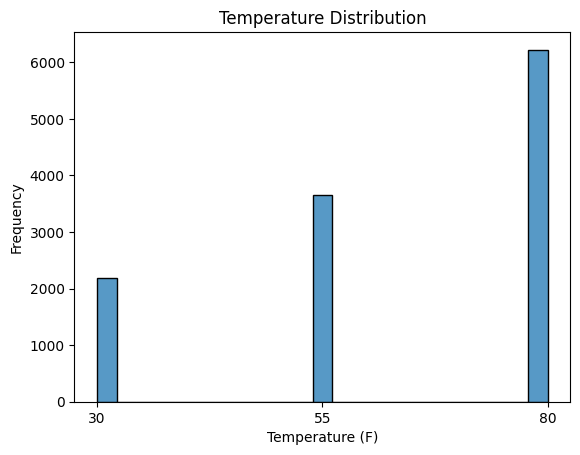

In [17]:
data['temperature'].unique()

sns.histplot(data['temperature'])
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.xticks(ticks=[30,55,80])
plt.title('Temperature Distribution')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
data_bar_coupons = data[data['coupon'] == 'Bar']
data_bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [19]:
bar_coupons_accepted = data_bar_coupons[data_bar_coupons['Y'] == 1]
print(f'Percent of coupons accepted: {round(len(bar_coupons_accepted)/len(data_bar_coupons), 4)*100}%')

Percent of coupons accepted: 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Acceptance rate where person visited a bar 3 or fewer times a month: 0.37 (641/1720)
Acceptance rate where person visited a bar more than 3 times a month: 0.76 (147/193)


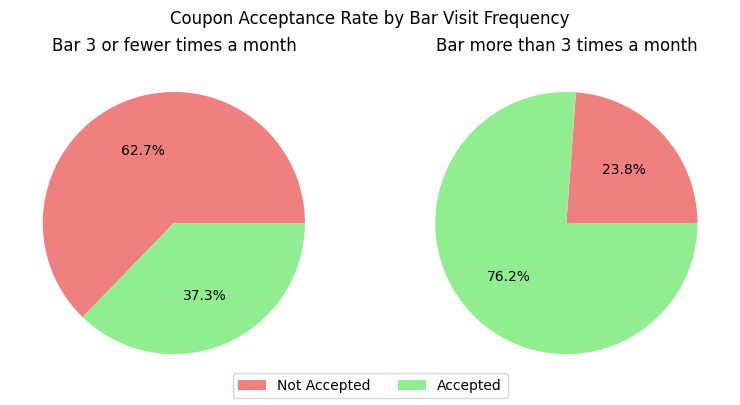

In [20]:
bar_value_counts = data_bar_coupons['Bar'].value_counts()
bar_value_counts

# Define bar visit groups
low_freq = ["never", "less1", "1~3"]
high_freq = ["4~8", "gt8"]

# Split the dataset
bar_groups = {
    "3 or fewer": data_bar_coupons.query('Bar in @low_freq'),
    "more than 3": data_bar_coupons.query('Bar in @high_freq')
}

# Calculate and print acceptance rates
for label, df in bar_groups.items():
    total = len(df)
    accepted = df['Y'].sum()  # Assumes Y is binary (0/1)
    rate = round(accepted / total, 2)
    print(f"Acceptance rate where person visited a bar {label} times a month: {rate} ({accepted}/{total})")

# Visualization using pie charts
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for ax, (label, df) in zip(axes, bar_groups.items()):
    counts = df['Y'].value_counts().sort_index()  # Ensure order: 0, 1
    ax.pie(counts, autopct="%1.1f%%", colors=["#f08080", "#90ee90"])
    ax.set_title(f"Bar {label} times a month")

fig.suptitle("Coupon Acceptance Rate by Bar Visit Frequency")
fig.legend(['Not Accepted', 'Accepted'], loc="lower center", ncol=2)
plt.tight_layout()
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate for ages >25 and visit bar >1/mo: 69.0 (278/403)



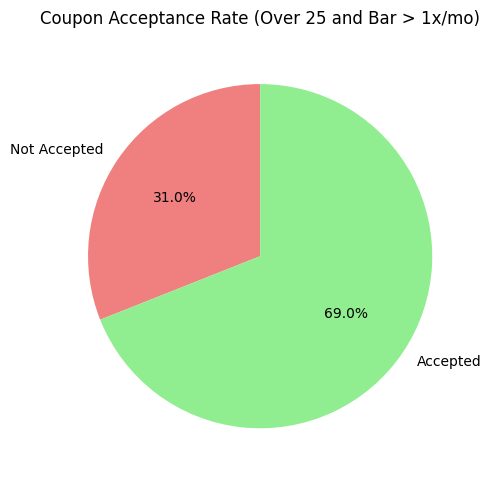

Acceptance rate for ages <=25 or visit bar <1/mo: 34.0 (510/1510)



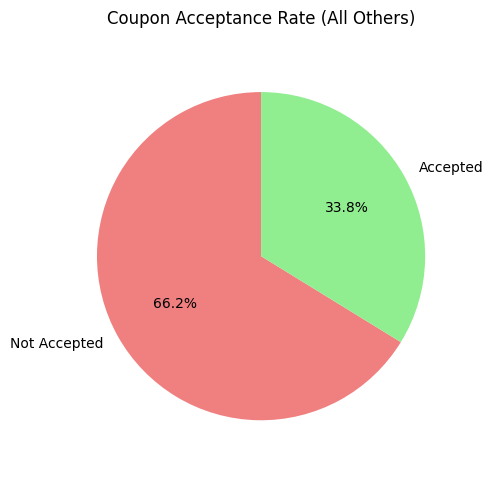

In [21]:
data_bar_coupons['age'].value_counts().sort_index()

# The age column has non-numeric values such as 50plus and below21
# Create new column 'numeric_age' with below21 and 50plus adjusted to 20 and 50, respectively
ages = data_bar_coupons['age'].copy()
ages = pd.to_numeric(ages.str.replace('below21', '20', regex=False).str.replace('50plus', '50', regex=False))
data_bar_coupons.insert(2, 'numeric_age', ages)

bardata = data_bar_coupons.query('numeric_age > 25 and Bar in ["1~3", "4~8", "gt8"]')
bardata_y = bardata['Y'].sum()

print(f'Acceptance rate for ages >25 and visit bar >1/mo: {round(bardata_y/len(bardata), 2)*100} ({bardata_y}/{len(bardata)})\n')

# Visualization using pie chart
# Count acceptance values (0 = Not Accepted, 1 = Accepted)
counts = bardata['Y'].value_counts().sort_index()

# Labels and colors
labels = ['Not Accepted', 'Accepted']
colors = ['#f08080', '#90ee90']

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Coupon Acceptance Rate (Over 25 and Bar > 1x/mo)")
plt.axis('equal')  # Keeps the pie chart circular
plt.tight_layout()
plt.show()

# Compare acceptance rate to all others
bardata_others = data_bar_coupons.query('not (numeric_age > 25 and Bar in ["1~3", "4~8", "gt8"])')
bardata_others_y = bardata_others['Y'].sum()

print(f'Acceptance rate for ages <=25 or visit bar <1/mo: {round(bardata_others_y/len(bardata_others), 2)*100} ({bardata_others_y}/{len(bardata_others)})\n')

# Visualization using pie chart
# Count acceptance values (0 = Not Accepted, 1 = Accepted)
counts_others = bardata_others['Y'].value_counts().sort_index()


# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts_others, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Coupon Acceptance Rate (All Others)")
plt.axis('equal')  # Keeps the pie chart circular
plt.tight_layout()
plt.show()


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Acceptance rate: 60.0 (44/73)



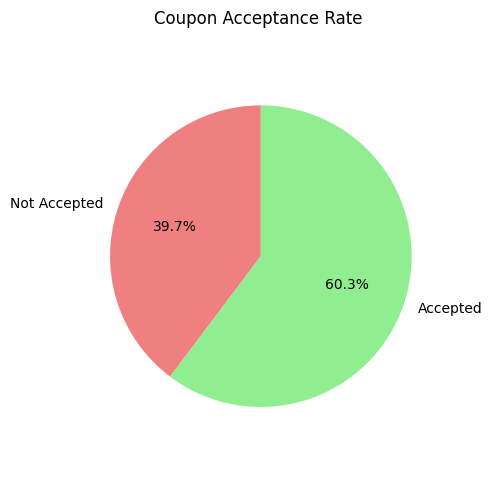

Acceptance rate: 40.0 (744/1840)



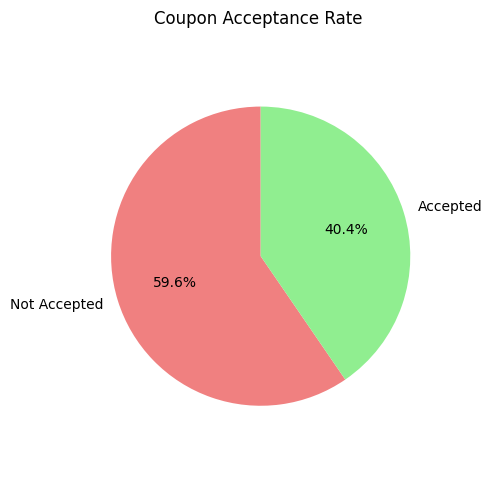

In [22]:
dataset = data_bar_coupons.query('Bar in ["1~3", "4~8", "gt8"] and passanger in ["Friends(s)", "Partner"] and occupation != "Farming Fishing & Forestry"')
dataset_y = dataset['Y'].sum()

print(f'Acceptance rate: {round(dataset_y/len(dataset), 2)*100} ({dataset_y}/{len(dataset)})\n')

# Visualization using pie chart
# Count acceptance values (0 = Not Accepted, 1 = Accepted)
counts_dataset = dataset['Y'].value_counts().sort_index()

# Labels and colors
labels = ['Not Accepted', 'Accepted']
colors = ['#f08080', '#90ee90']

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts_dataset, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Coupon Acceptance Rate ")
plt.axis('equal')  # Keeps the pie chart circular
plt.tight_layout()
plt.show()

dataset_others = data_bar_coupons.query('not (Bar in ["1~3", "4~8", "gt8"] and passanger in ["Friends(s)", "Partner"] and occupation != "Farming Fishing & Forestry")')
dataset_others_y = dataset_others['Y'].sum()

print(f'Acceptance rate: {round(dataset_others_y/len(dataset_others), 2)*100} ({dataset_others_y}/{len(dataset_others)})\n')

# Visualization using pie chart
counts_dataset_others = dataset_others['Y'].value_counts().sort_index()
plt.figure(figsize=(5, 5))
plt.pie(counts_dataset_others, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Coupon Acceptance Rate ")
plt.axis('equal')  # Keeps the pie chart circular
plt.tight_layout()
plt.show()



6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



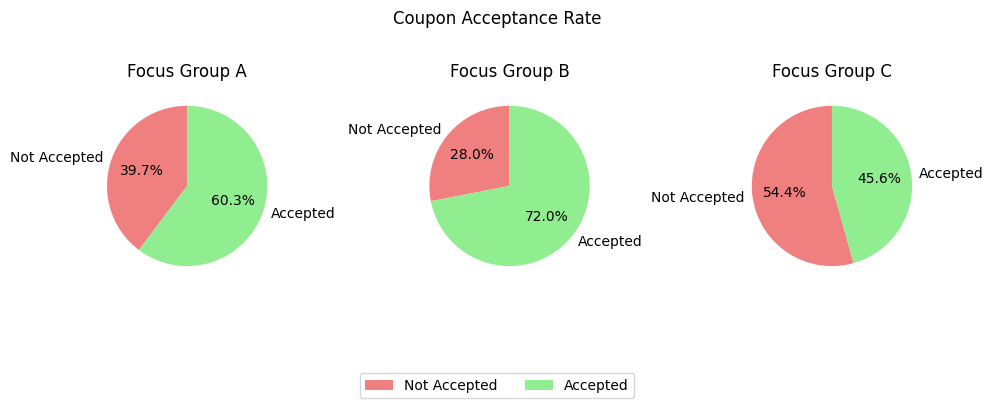

In [23]:

# Define focus groups with clear queries
bardata_a = data_bar_coupons.query(
    'Bar in ["1~3", "4~8", "gt8"] and passanger in ["Friends(s)", "Partner"] and maritalStatus != "Widowed"'
)
bardata_b = data_bar_coupons.query(
    'Bar in ["1~3", "4~8", "gt8"] and numeric_age < 30'
)
bardata_c = data_bar_coupons.query(
    'RestaurantLessThan20 in ["4~8", "gt8"] and income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]'
)

# Group list for iteration
groups = {
    "Focus Group A": bardata_a,
    "Focus Group B": bardata_b,
    "Focus Group C": bardata_c,
}

# Plot pie charts
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
colors = ['#f08080', '#90ee90']
labels = ['Not Accepted', 'Accepted']

for ax, (title, df) in zip(axes, groups.items()):
    counts = df['Y'].value_counts().sort_index()
    ax.pie(counts, autopct='%1.1f%%', labels=labels, colors=colors, startangle=90)
    ax.set_title(title)

# Layout and legend
fig.suptitle("Coupon Acceptance Rate")
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
fig.legend(labels, loc="lower center", ncol=2)
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who frequently visit bars or restaurants are more likely to accept coupons. Younger drivers tend to accept coupons more than older drivers. Drivers traveling with friends or partners are more likely to accept bar coupons than those traveling alone.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Hypothesis 1**: Users are more likely to accept coffee house coupons in the morning.

In [24]:
data.shape
coffee_data = data.query('coupon == "Coffee House"')
coffee_data.shape
coffee_data.value_counts('time')


,count
time,
6PM,1043
7AM,875
10AM,857
2PM,759
10PM,282


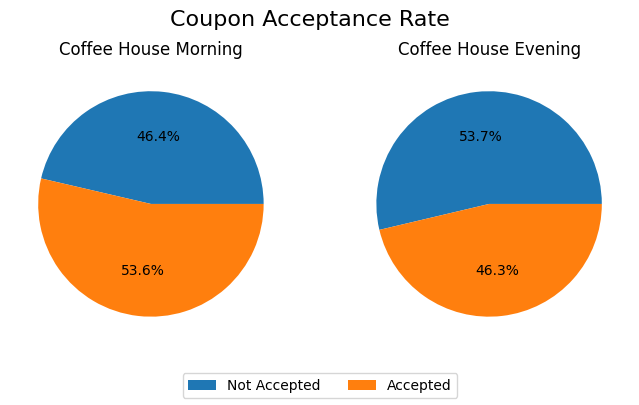

In [25]:
coffee_data_morning = coffee_data.query('time in ["7AM", "10AM"]')
coffee_data_evening = coffee_data.query('time in ["6PM", "2PM", "10PM"]')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
pie1 = axes[0].pie(coffee_data_morning.groupby('Y')['Y'].count(), autopct="%1.1f%%")
pie2 = axes[1].pie(coffee_data_evening.groupby('Y')['Y'].count(), autopct="%1.1f%%")
axes[0].set_title(label="Coffee House Morning")
axes[1].set_title(label="Coffee House Evening")
fig.suptitle("Coupon Acceptance Rate", fontsize=16)
fig.legend(('Not Accepted', 'Accepted'), loc="lower center", ncol=2)
sns.set_palette('Paired')
plt.show()

**Result:** From the pie chart, we can observe that the coupons for coffee houses are more likely to be accepted in the morning. This is likely due to the fact that people grab coffee on the way to work or running errands.

**Hypothesis 2:** Lower-income individuals dining more frequently at more expensive restaurants are more likely to accept coupons for expensive restaurants.

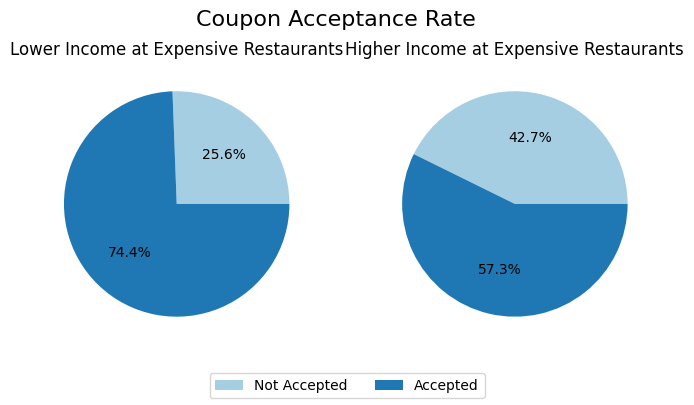

In [26]:
# Using groupby to look at combination of income and expensive restaurants
data.groupby(["Restaurant20To50", "income"], as_index = False)["Y"].agg(['count', 'mean']).round(2).sort_values(by ='count')

dataset_lower_income = data.query('Restaurant20To50 in ["4~8", "gt8"] and income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]')
dataset_lower_income['Y'].value_counts()

dataset_higher_income = data.query('Restaurant20To50 in ["4~8", "gt8"] and income in ["$50000 - $62499", "$62500 - $74999", "$75000 - $87499",  "$87500 - $99999", "$100000 or More"]')
dataset_higher_income['Y'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
pie1 = axes[0].pie(dataset_lower_income.groupby('Y')['Y'].count(), autopct="%1.1f%%")
pie2 = axes[1].pie(dataset_higher_income.groupby('Y')['Y'].count(), autopct="%1.1f%%")
axes[0].set_title(label="Lower Income at Expensive Restaurants")
axes[1].set_title(label="Higher Income at Expensive Restaurants")
fig.suptitle("Coupon Acceptance Rate", fontsize=16)
fig.legend(('Not Accepted', 'Accepted'), loc="lower center", ncol=4)
sns.set_palette('Paired')
plt.show()


**Result:** The pie charts show that the higher earners are less likely to use coupons at expensive restarants than lower eaners.  

**Hypothesis 3**:  Customers are more likely to accept coupons on their way home and the restaurant is in the same direction

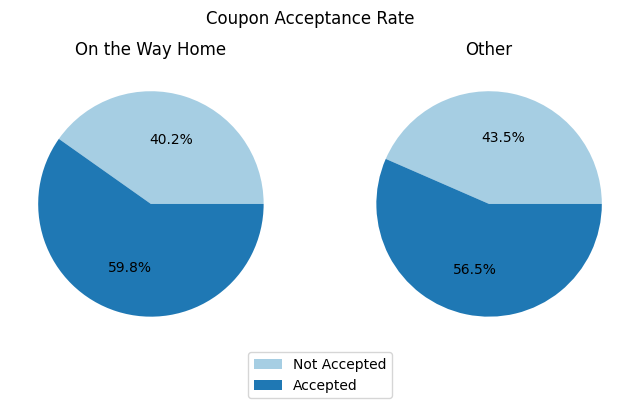

In [27]:
same_direction = data.query('direction_same == 1 and destination == "Home"')
opposite_direction = data.query('not (direction_same == 1 and destination == "Home")')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
pie1 = axes[0].pie(same_direction.groupby('Y')['Y'].count(), autopct="%1.1f%%")
pie2 = axes[1].pie(opposite_direction.groupby('Y')['Y'].count(), autopct="%1.1f%%")
axes[0].set_title(label="On the Way Home")
axes[1].set_title(label="Other")
fig.suptitle("Coupon Acceptance Rate")
fig.legend(('Not Accepted','Accepted'), loc="lower center")
sns.set_palette('Paired')
plt.show()

**Result:** The data corroborates the hypothesis that coupons are likely to be accepted if the restaurant is on the way home.

**Hypothesis 4:** People with kids as passengers are less likely to accept coupons

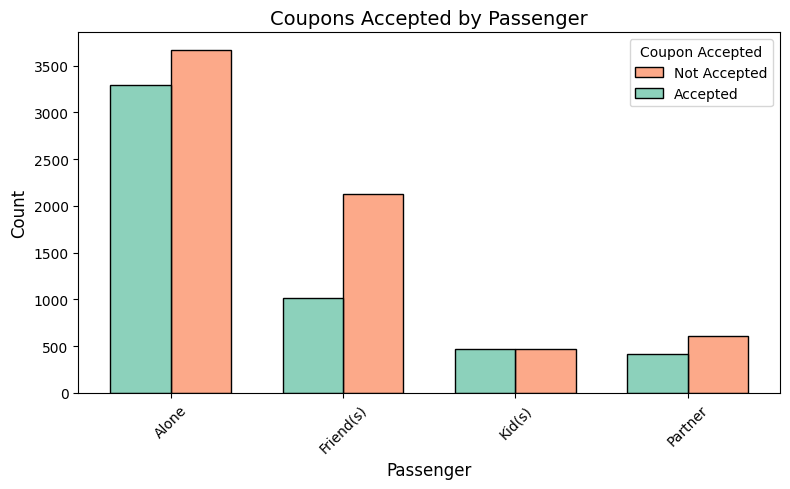

In [28]:
sns.set_palette("Set2")

plt.figure(figsize=(8, 5))
ax = sns.histplot(data, x='passanger', hue='Y', multiple='dodge', shrink=0.7)
ax.legend(title='Coupon Accepted', labels=('Not Accepted', 'Accepted'))
ax.set_title('Coupons Accepted by Passenger', fontsize=14)
ax.set_xlabel('Passenger', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Result:** It is likely that passengers with kids in the car might not want to accept the coupon if it means an extra stop on the way to the destination.

**Hypothesis 5**: Coupons in the evening are most likely to be accepted

Text(0.5, 1.0, 'Coupons Accepted by Time')

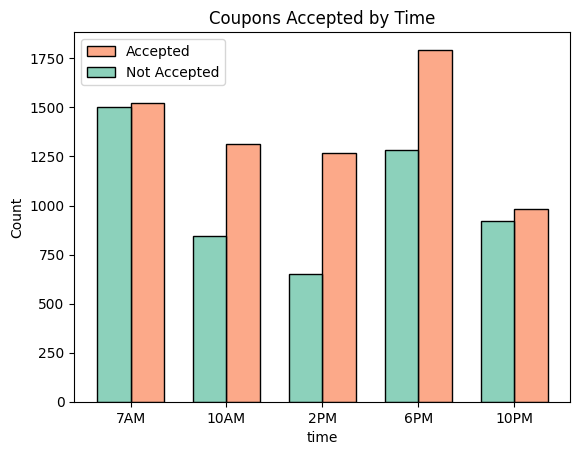

In [29]:
data['time'] = pd.Categorical(data['time'], ['7AM', '10AM', '2PM', '6PM', '10PM'])
ax = sns.histplot(data, x='time', hue='Y', multiple='dodge', shrink=0.7)
ax.legend(labels=('Accepted','Not Accepted'))
ax.set_title('Coupons Accepted by Time')

**Result:** Zooming out a little, the data also supports the hypothesis that in general coupons were accepted in the evening.